<a href="https://colab.research.google.com/github/afraa-n/Explainable-Techniques-II/blob/main/Explainable_Techniques_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #6 - Explainable Techniques II: PDP, ICE, and ALE Plots

## Introduction

This notebook demonstrates the application of explainable AI techniques to analyze the Breast Cancer Wisconsin dataset. We'll use Partial Dependence Plots (PDP), Individual Conditional Expectation (ICE) plots, and Accumulated Local Effects (ALE) plots to understand how different features affect the prediction of breast cancer diagnosis.

## Dataset Description

Target variable:
- target:

## Methodology

1. Data Loading and Preprocessing
2. Exploratory Data Analysis
3. Model Training (Random Forest Classifier)
4. Implementation of Explainable AI Techniques:
   - Partial Dependence Plots (PDP)
   - Individual Conditional Expectation (ICE) Plots
   - Accumulated Local Effects (ALE) Plots
5. Analysis and Interpretation of Results

In [1]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-el206ij1/alepython_cb04311a4a7b4f96914ea8568b0c6a0f
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-el206ij1/alepython_cb04311a4a7b4f96914ea8568b0c6a0f
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.3 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350a-py3-none-any.whl size=15139 sha256=f10904212f8747d989e7eec4f9ef15c7b68d6a2e9ed1a7c6c659d0bf91ab318b
  Stored in directory: /tmp/pip-ephem-wheel-cache-vcmagtpm/wheels/80/2e/91/7f216caef9a7f0c6ce18ee562b6156df43b3a79f69a0c1f3d1
Successfully built alepython


In [2]:
!pip install pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from pdpbox import pdp, info_plots
from alepython import ale_plot

# Load the Titanic dataset from seaborn library
data = sns.load_dataset('titanic')

# Select a subset of columns for simplicity and drop rows with missing values
data = data[['pclass', 'age', 'sex', 'fare', 'survived']].dropna()

# Convert categorical features to numeric
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

Dataset Shape: (714, 5)
First Few Rows of the Dataset:
   pclass   age  sex     fare  survived
0       3  22.0    0   7.2500         0
1       1  38.0    1  71.2833         1
2       3  26.0    1   7.9250         1
3       1  35.0    1  53.1000         1
4       3  35.0    0   8.0500         0

Missing Values per Column:
pclass      0
age         0
sex         0
fare        0
survived    0
dtype: int64

Data Types:
pclass        int64
age         float64
sex           int64
fare        float64
survived      int64
dtype: object

Statistical Summary of Numerical Features:
           pclass         age         sex        fare    survived
count  714.000000  714.000000  714.000000  714.000000  714.000000
mean     2.236695   29.699118    0.365546   34.694514    0.406162
std      0.838250   14.526497    0.481921   52.918930    0.491460
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      1.000000   20.125000    0.000000    8.050000    0.000000
50%      2.000000   28.0000

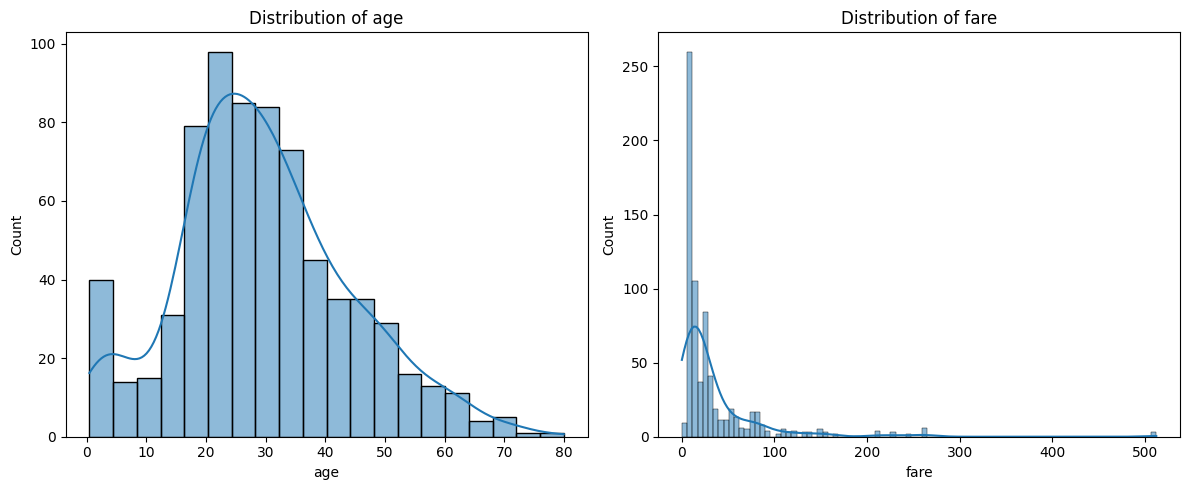

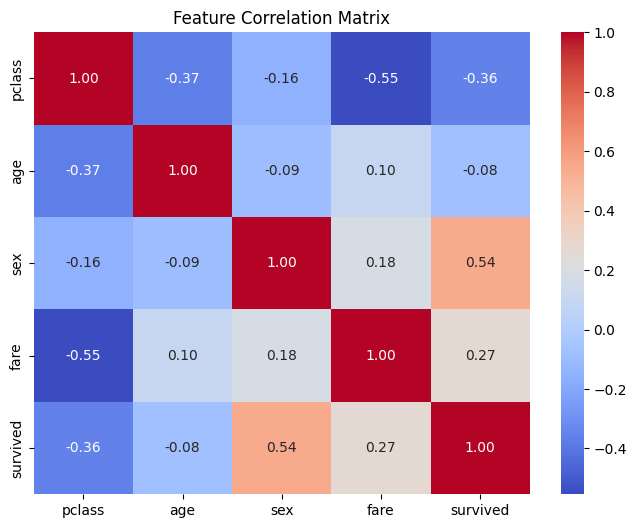

In [4]:
# EDA

# 1. Dataset Overview
print("Dataset Shape:", data.shape)
print("First Few Rows of the Dataset:")
print(data.head())

# 2. Check for Missing Values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# 3. Data Type Inspection
print("\nData Types:")
print(data.dtypes)

# 4. Statistical Summary
print("\nStatistical Summary of Numerical Features:")
print(data.describe())

# 5. Distribution of Numerical Features
numerical_features = ['age', 'fare']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 6. Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [5]:
# 7. Train-Test Split
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Model Evaluation
print("\nModel Score (Training):", model.score(X_train, y_train))
print("Model Score (Testing):", model.score(X_test, y_test))


Model Score (Training): 0.9912434325744308
Model Score (Testing): 0.7482517482517482


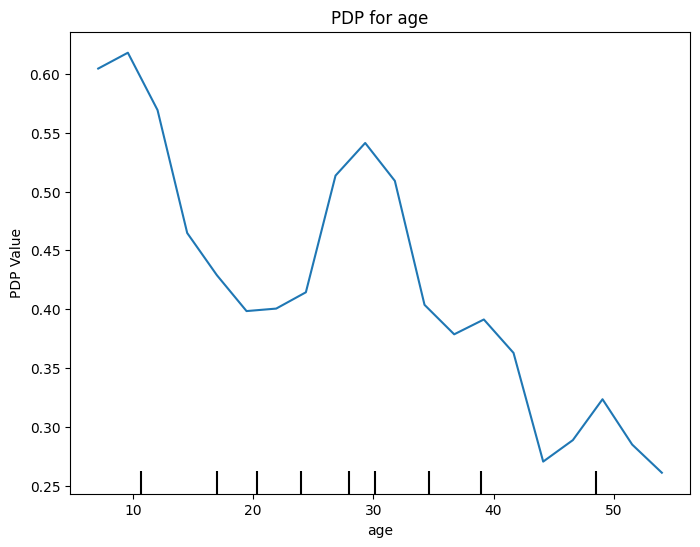

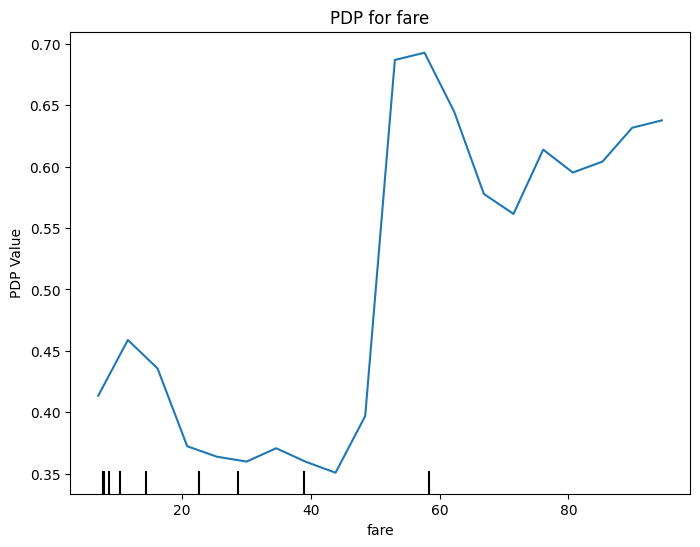

In [6]:
# Define features for PDP and ICE
features = ['age', 'fare']  # Choose relevant numerical features from the dataset

# PDP Plots
for feature in features:
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='average', grid_resolution=20, ax=ax
    )
    plt.title(f"PDP for {feature}")
    plt.ylabel("PDP Value")
    plt.xlabel(feature)
    plt.show()


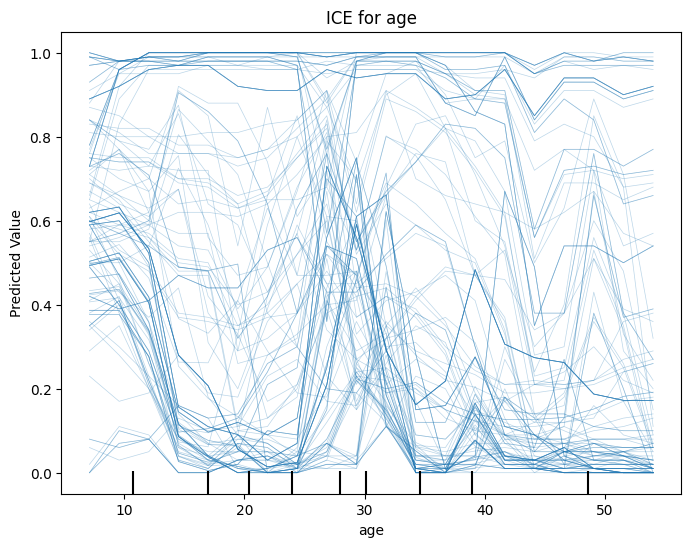

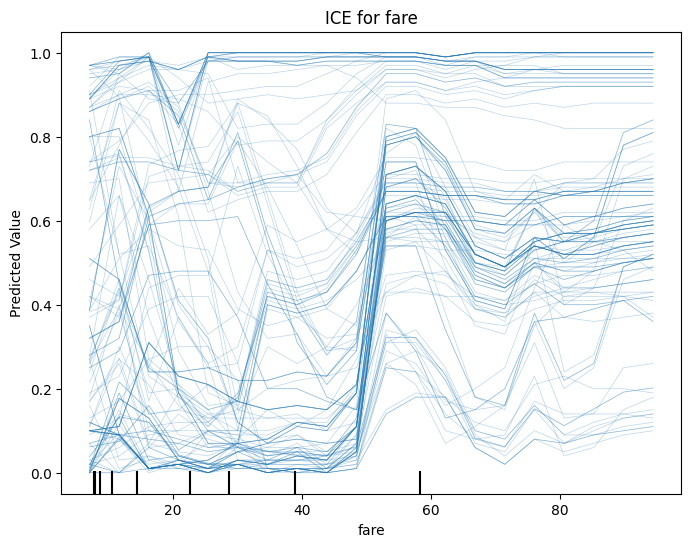

In [7]:
# ICE Plots
for feature in features:
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='individual', grid_resolution=20, ax=ax
    )
    plt.title(f"ICE for {feature}")
    plt.ylabel("Predicted Value")
    plt.xlabel(feature)
    plt.show()

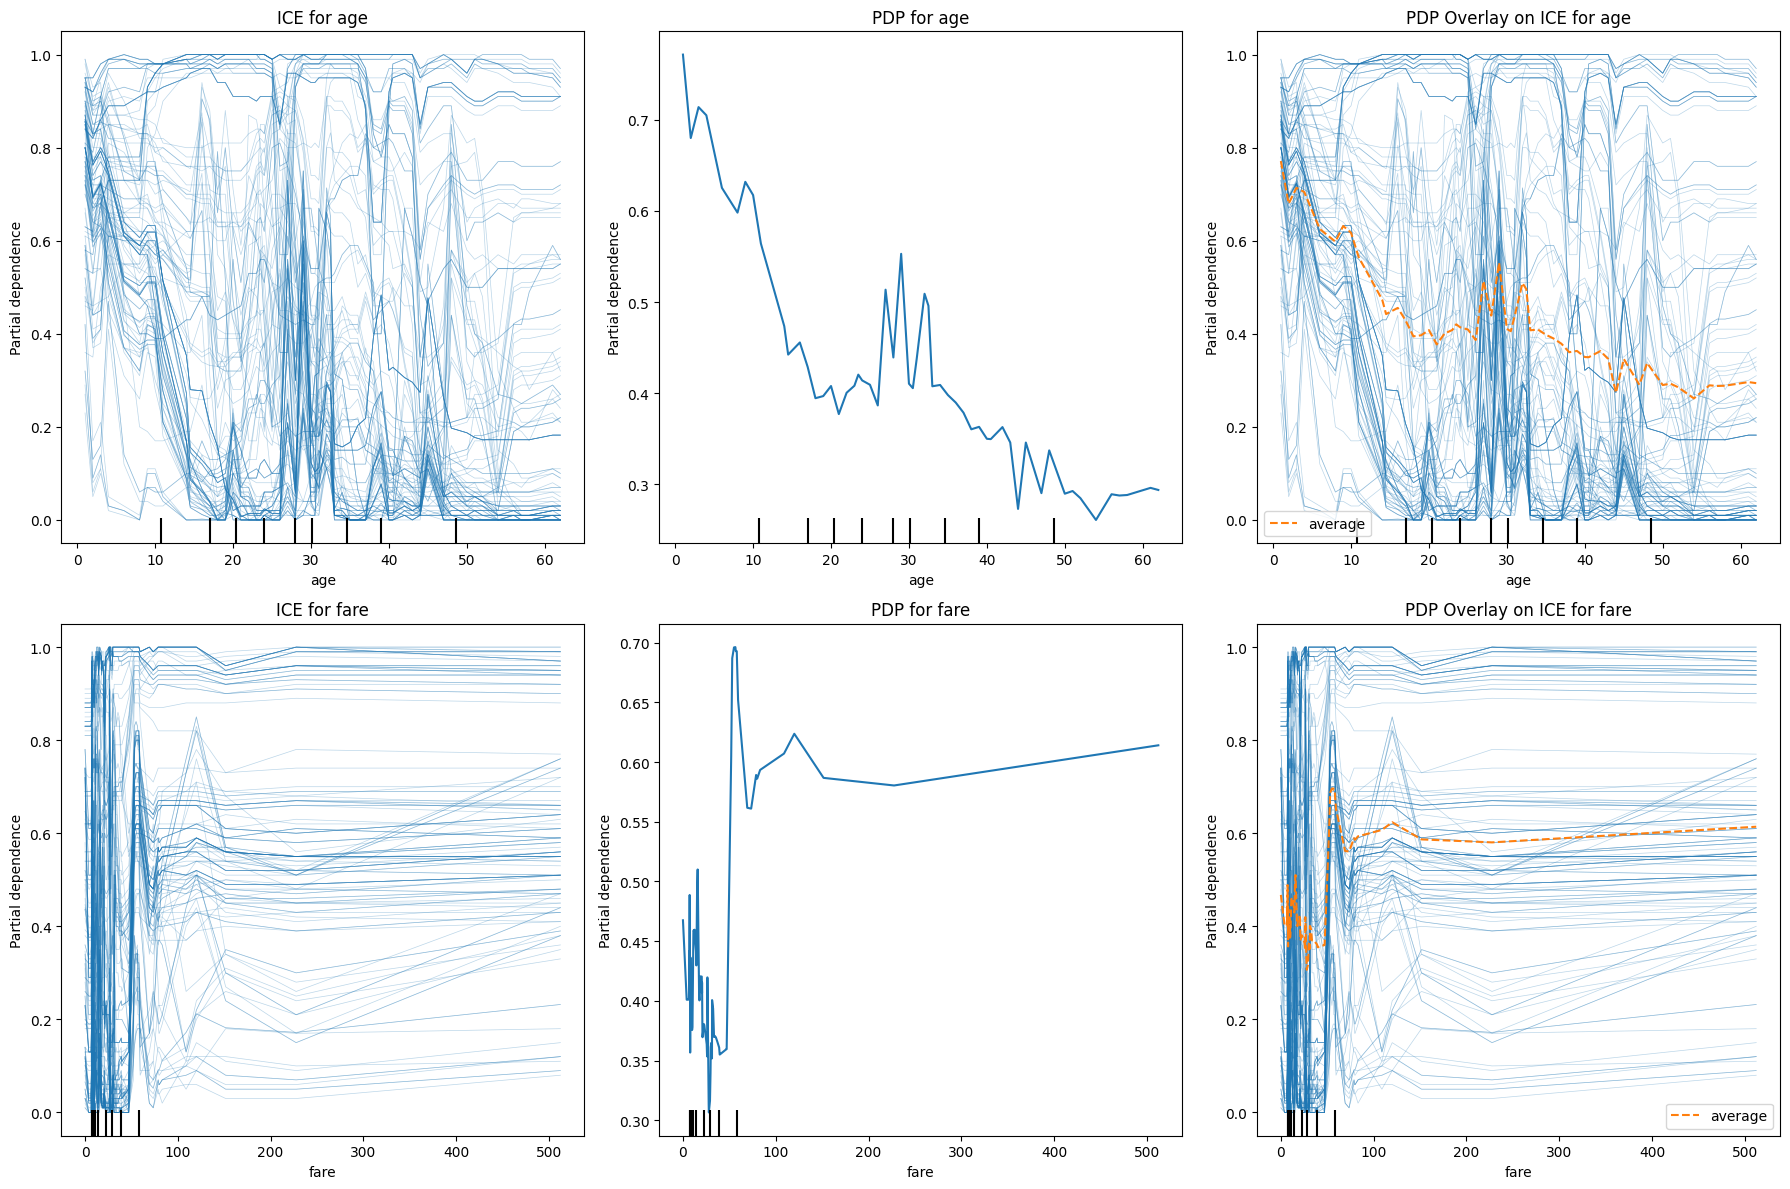

In [8]:
# Features to plot
features = ['age', 'fare']

# Create subplots
fig, axes = plt.subplots(len(features), 3, figsize=(18, 12))

for i, feature in enumerate(features):
    # ICE Plot
    ice_display = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='individual', ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'ICE for {feature}')

    # PDP Plot
    pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='average', ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'PDP for {feature}')

    # Overlay PDP on ICE Plot
    # First, plot the ICE plot and capture axes_
    ice_pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='both', ax=axes[i, 2]  # 'both' combines PDP and ICE
    )
    axes[i, 2].set_title(f'PDP Overlay on ICE for {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

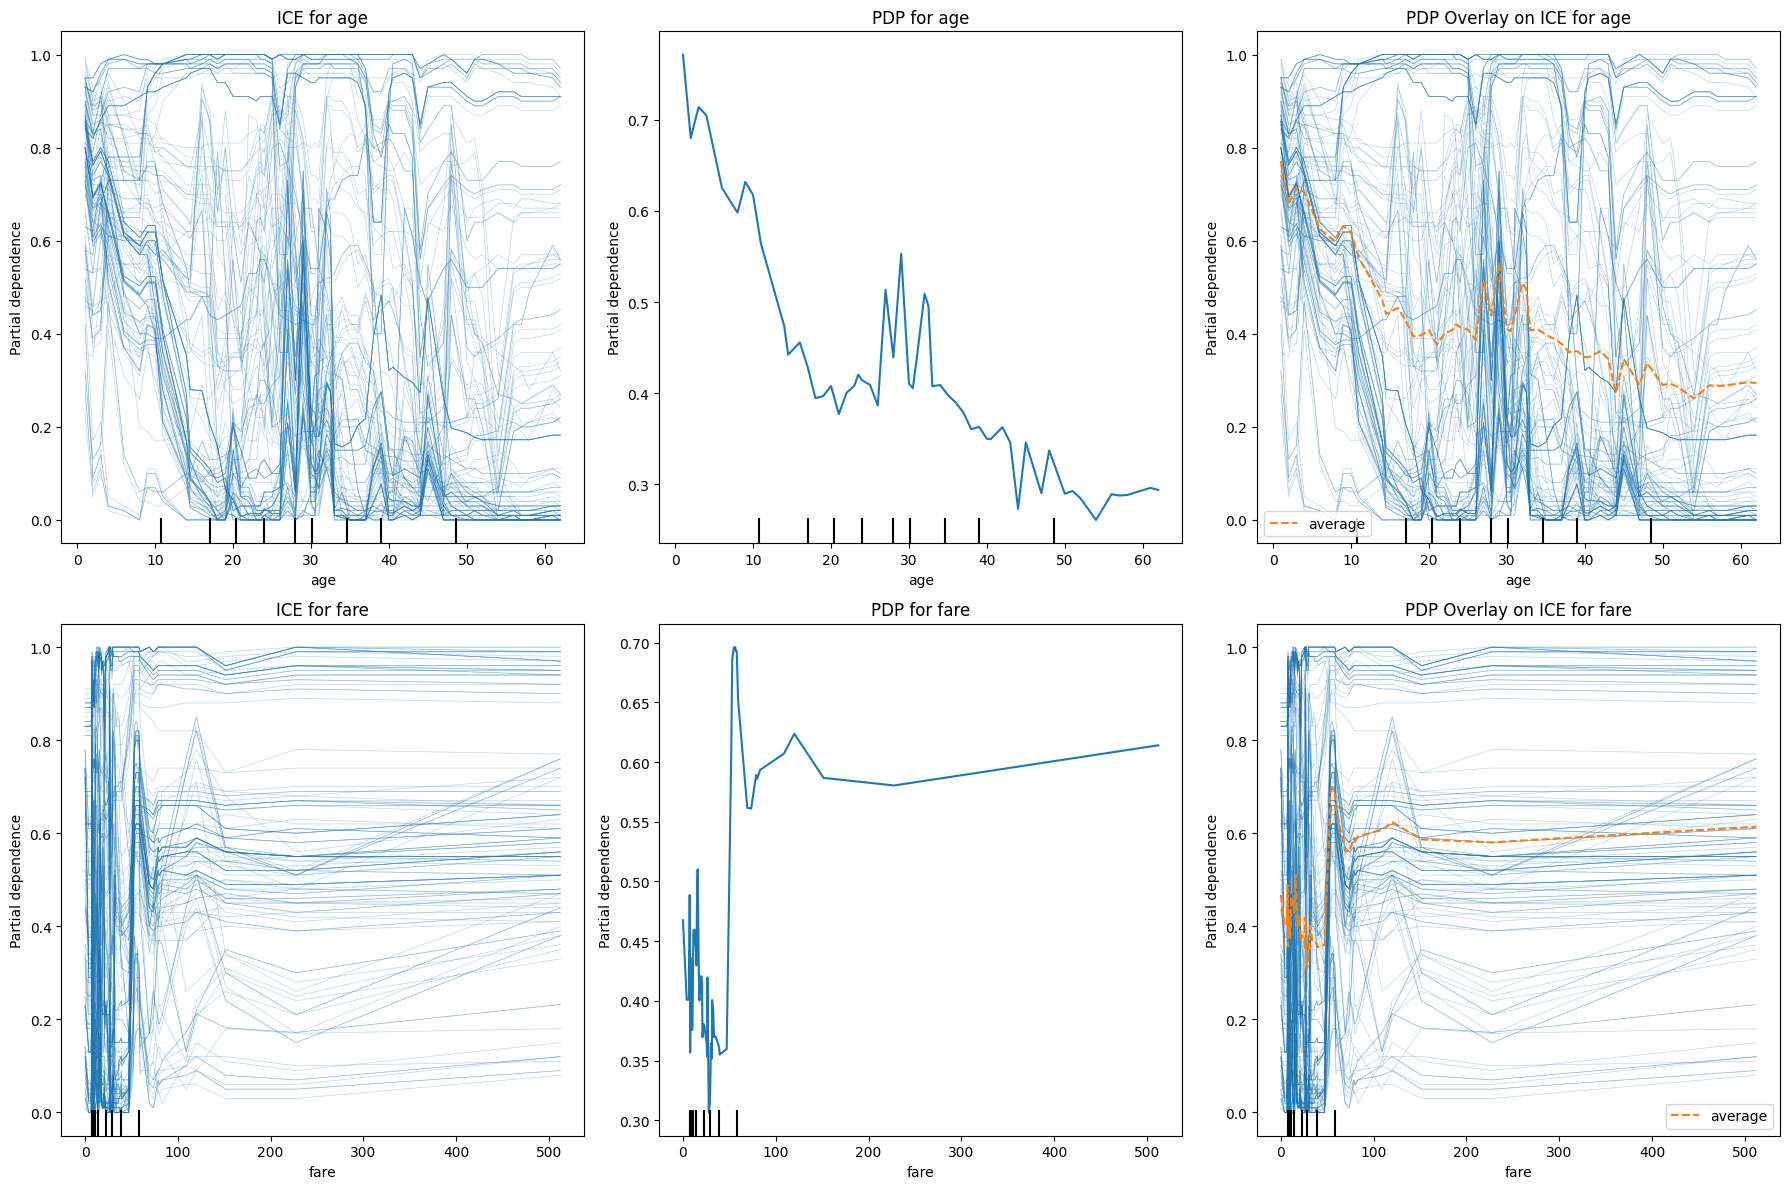

In [9]:
# Features to plot
features = ['age', 'fare']

# Create subplots for ICE, PDP, and Overlay
fig, axes = plt.subplots(len(features), 3, figsize=(18, 12))

for i, feature in enumerate(features):
    # ICE Plot
    ice_display = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='individual', ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'ICE for {feature}')

    # PDP Plot
    pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='average', ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'PDP for {feature}')

    # Overlay PDP on ICE Plot
    # First, plot the ICE plot and capture axes_
    ice_pdp_display = PartialDependenceDisplay.from_estimator(
        model, X_test, [feature], kind='both', ax=axes[i, 2]  # 'both' combines PDP and ICE
    )
    axes[i, 2].set_title(f'PDP Overlay on ICE for {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

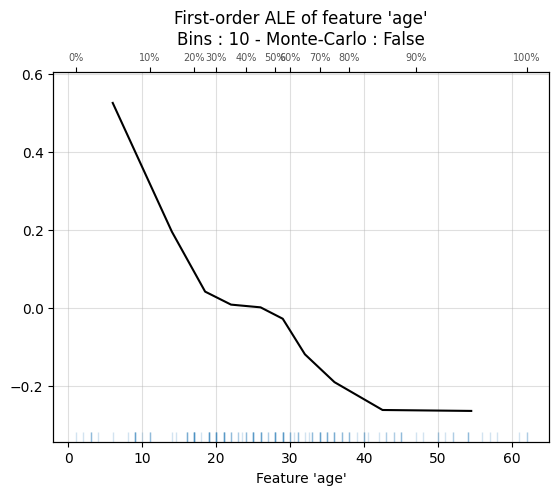

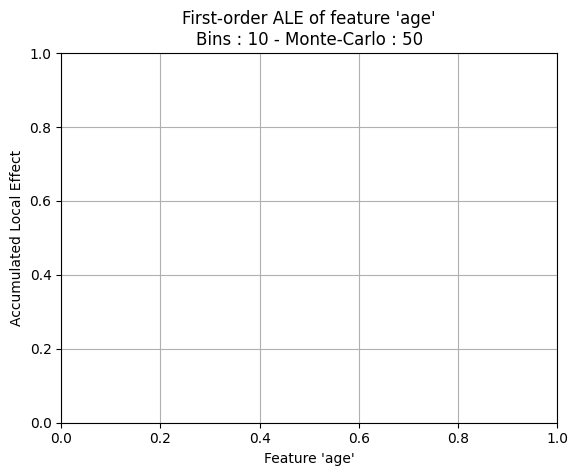

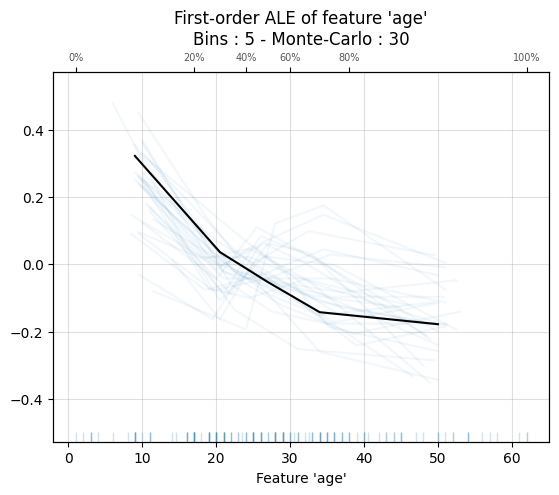

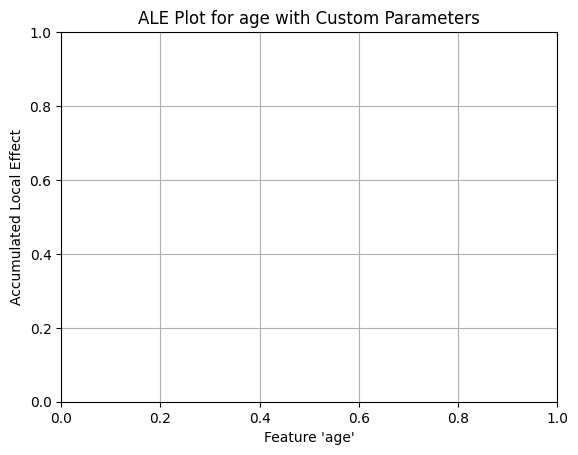

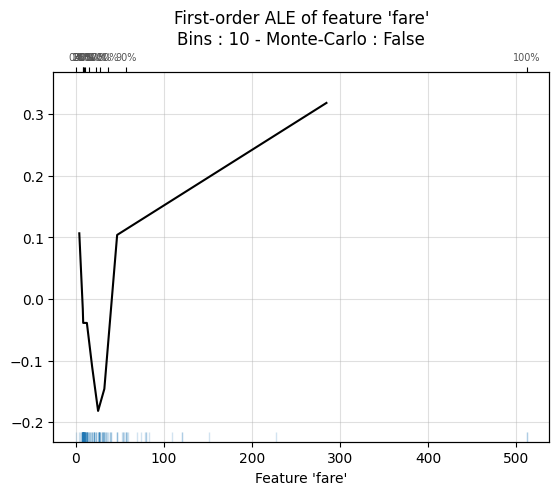

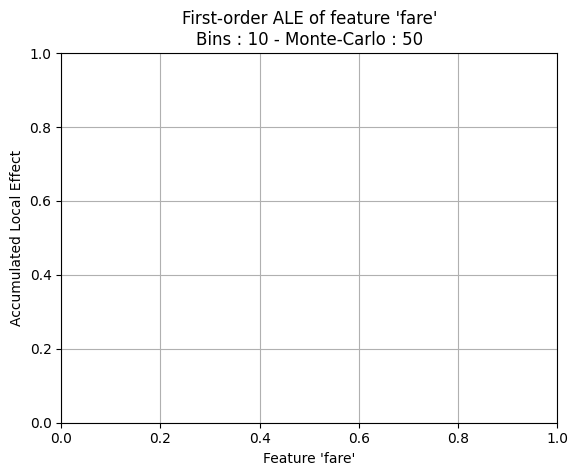

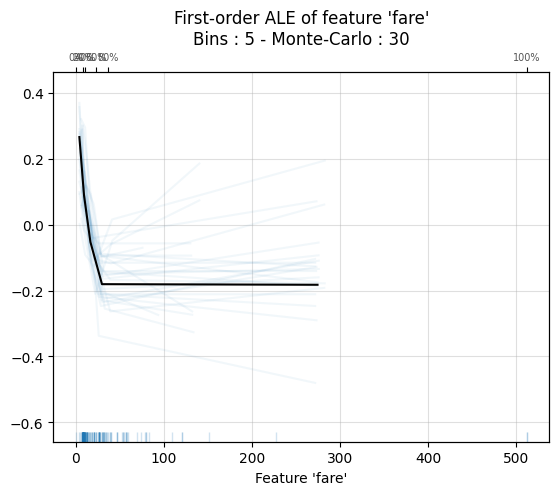

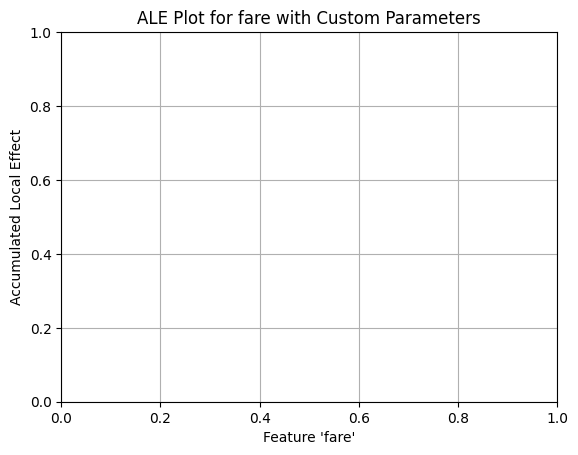

In [10]:
# Generate ALE plots for each feature
for feature in features:
    # Use default parameters for 1D Main Effect ALE Plot
    ale_plot(
        model,          # Model used for predictions
        X_test,         # Dataset on which to calculate ALE
        feature         # Feature for which the ALE is calculated
    )
    plt.title(f"First-order ALE of feature '{feature}'\nBins : 10 - Monte-Carlo : 50")
    plt.xlabel(f"Feature '{feature}'")
    plt.ylabel('Accumulated Local Effect')
    plt.grid()
    plt.show()

    # Change hyperparameters for 1D Main Effect ALE Plot
    ale_plot(
        model,            # Model used for predictions
        X_test,           # Dataset on which to calculate ALE
        feature,          # Feature for which the ALE is calculated
        bins=5,           # Number of bins
        monte_carlo=True, # Enable Monte-Carlo simulation
        monte_carlo_rep=30,       # Number of Monte-Carlo repetitions
        monte_carlo_ratio=0.5     # Ratio for Monte-Carlo
    )
    plt.title(f"ALE Plot for {feature} with Custom Parameters")
    plt.xlabel(f"Feature '{feature}'")
    plt.ylabel('Accumulated Local Effect')
    plt.grid()
    plt.show()


<Figure size 800x600 with 0 Axes>

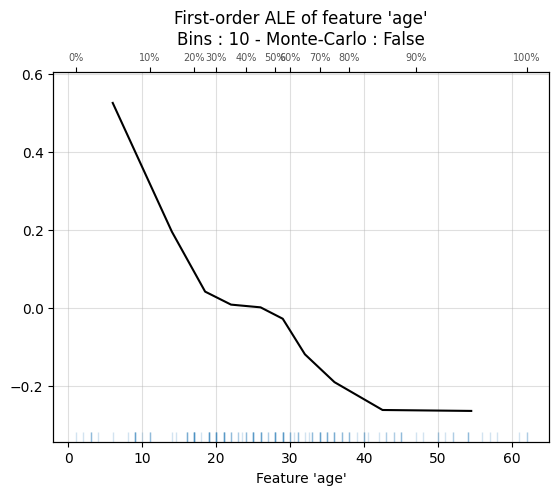

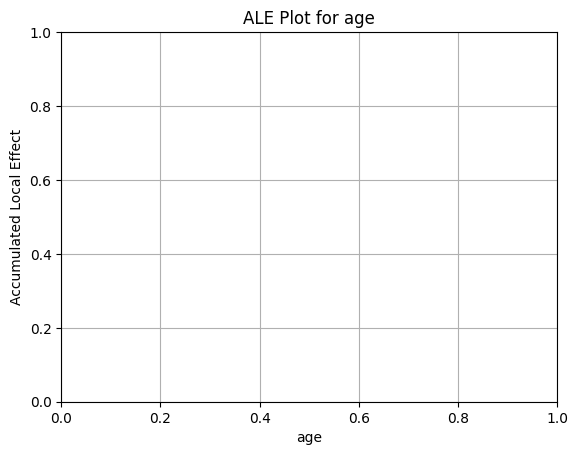

<Figure size 800x600 with 0 Axes>

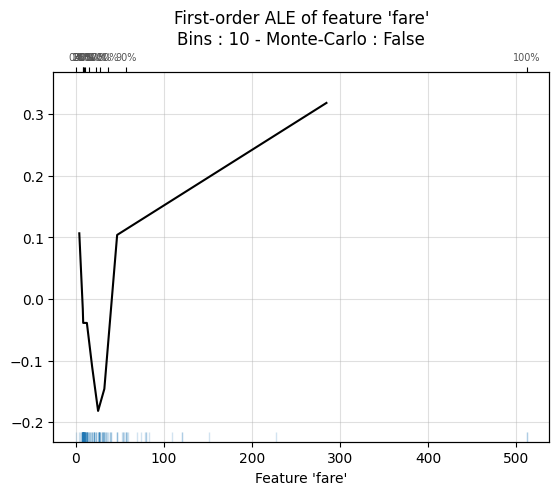

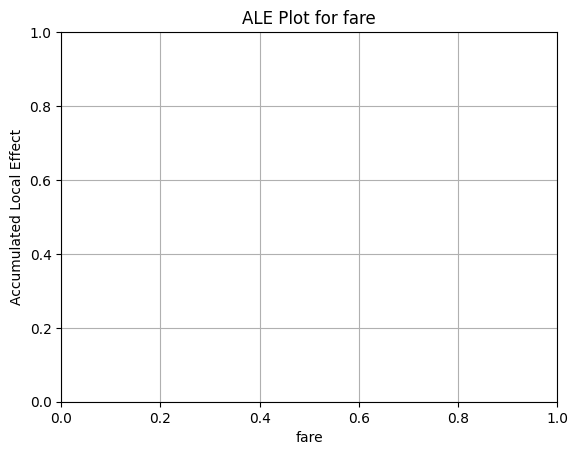

In [11]:
# Function to plot ALE for a given feature
def plot_ale(feature):
    plt.figure(figsize=(8, 6))
    ale_plot(model, X_test, feature)
    plt.title(f'ALE Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Accumulated Local Effect')
    plt.grid()
    plt.show()

# Plot ALE for 'age'
plot_ale('age')

# Plot ALE for 'fare'
plot_ale('fare')